# Training a CNN with Keras and the CheXpert dataset

In [1]:
from tensorflow import keras
import numpy as np
import glob
import scipy
import pandas as pd
import sklearn
import re

### Load xrays

In [99]:
import os
os.chdir("E://CheXpert-v1.0-small/CheXpert-v1.0-small/")

'E:\\CheXpert-v1.0-small\\CheXpert-v1.0-small'

In [100]:
# load filepaths of front cxray
fp = glob.glob('\\train\\**\\study1\\*frontal.jpg')
fp_valid = glob.glob('\\valid\\**\\**\\*frontal.jpg')

In [17]:
xrays = []

for file in fp:
    img = scipy.ndimage.imread(file)
    img = scipy.misc.imresize(img, (320,320))
    xrays.append(img)
    
xrays = np.array(xrays)
xrays = np.expand_dims(xrays, axis=3)

xrays_valid = []

for file in fp_valid:
    img = scipy.ndimage.imread(file)
    img = scipy.misc.imresize(img, (320,320))
    xrays_valid.append(img)
    
xrays_valid = np.array(xrays_valid)
xrays_valid = np.expand_dims(xrays_valid, axis=3)

E:\bin\miniconda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
E:\bin\miniconda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """
E:\bin\miniconda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
E:\bin\miniconda\envs\tfgpu\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  from ipykernel import kernelapp as app


In [21]:
xrays = (xrays)/(255)

xrays_valid = (xrays_valid)/(255)

MemoryError: 

In [20]:
xrays.shape

(65945, 320, 320, 1)

### phenotypes

In [25]:
# labels
fp = [re.sub(".*train.",'',x) for x in fp]
fp = [x.replace('\\','/') for x in fp]
fp = np.array(fp)

fp_valid = [re.sub(".*valid.",'',x) for x in fp_valid]
fp_valid = [x.replace('\\','/') for x in fp_valid]
fp_valid = np.array(fp_valid)

In [26]:
fp[1:3]

array(['patient00002/study1/view1_frontal.jpg',
       'patient00003/study1/view1_frontal.jpg'], dtype='<U37')

In [27]:
# TRAIN
# phenotypes
y1 = pd.read_csv('E://CheXpert-v1.0-small/CheXpert-v1.0-small/train.csv')
ylab1 = y1['Path'].replace(to_replace='.*train/',value='', regex=True)
ylab1 = np.array(ylab1)
y1.set_index(ylab1, inplace=True)
y1 = y1.loc[fp]

# get one hot encoding subset, replace NAs and drop uncertainty values
y1 = y1.iloc[:,6:].fillna(0).replace(-1.0,0)

# add column for control status
y1['control'] = np.array(y1.iloc[:,:].sum(axis=1) == 0).astype(int)

# VALIDATE
# phenotypes
y2 = pd.read_csv('E://CheXpert-v1.0-small/CheXpert-v1.0-small/valid.csv')
ylab2 = y2['Path'].replace(to_replace='.*valid/',value='', regex=True)
ylab2 = np.array(ylab2)
y2.set_index(ylab2, inplace=True)
y2 = y2.loc[fp_valid]

# get one hot encoding subset, replace NAs and drop uncertainty values
y2 = y2.iloc[:,6:].fillna(0).replace(-1.0,0)

# add column for control status
y2['control'] = np.array(y2.iloc[:,:].sum(axis=1) == 0).astype(int)

In [28]:
y1

,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,control
patient00001/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
patient00002/study1/view1_frontal.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
patient00003/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
patient00004/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
patient00005/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
patient00006/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
patient00007/study1/view1_frontal.jpg,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
patient00008/study1/view1_frontal.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
patient00009/study1/view1_frontal.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
patient00010/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [29]:
y1.sum()

Enlarged Cardiomediastinum     3814.0
Cardiomegaly                   6702.0
Lung Opacity                  26345.0
Lung Lesion                    3124.0
Edema                         12048.0
Consolidation                  3317.0
Pneumonia                      1982.0
Atelectasis                    9706.0
Pneumothorax                   3698.0
Pleural Effusion              16476.0
Pleural Other                   987.0
Fracture                       3499.0
Support Devices               26942.0
control                       11512.0
dtype: float64

In [43]:
y1.shape

(65945, 14)

In [30]:
y2.sum()

Enlarged Cardiomediastinum    105.0
Cardiomegaly                   66.0
Lung Opacity                  117.0
Lung Lesion                     1.0
Edema                          42.0
Consolidation                  32.0
Pneumonia                       8.0
Atelectasis                    75.0
Pneumothorax                    7.0
Pleural Effusion               64.0
Pleural Other                   1.0
Fracture                        0.0
Support Devices                99.0
control                        31.0
dtype: float64

### model definition

In [31]:
from time import time
tensorboard = keras.callbacks.TensorBoard(log_dir='./Graph/{}'.format(time()), histogram_freq=1,  
          write_graph=True, write_images=True)

In [49]:
def cnn_model(input_shape):
    model = keras.models.Sequential()
    
    model.add(keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), input_shape=input_shape[1:]))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))
        
    model.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))
    
    model.add(keras.layers.Conv2D(128, kernel_size=(4,4), strides=(1,1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))
    
    model.add(keras.layers.Conv2D(256, kernel_size=(4,4), strides=(1,1)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(keras.layers.Dropout(0.2))
    
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(256))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Dense(128))
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.Activation('relu'))
    
    model.add(keras.layers.Dense(14, activation='sigmoid'))
    
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])
    
    return model

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 319, 319, 32)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 319, 319, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 319, 319, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 159, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 157, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 157, 157, 64)      256       
__________

In [53]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [72]:
dense = keras.applications.densenet.DenseNet121(include_top=False, input_shape=(*xrays.shape[1:3],3))
input_layer = dense.input

x = dense.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(14, activation='sigmoid')(x)

model = keras.models.Model(inputs=input_layer, outputs=x)
model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=keras.optimizers.Adam(lr=0.0001),
                 metrics=['accuracy'])

In [33]:
model = cnn_model(xrays.shape)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
stacked_xrays = np.stack((xrays,)*3,axis=3)
stacked_xrays = stacked_xrays[:,:,:,:,0]

In [85]:
stacked_xrays.shape

(65945, 320, 320, 3)

In [89]:
xrays.shape

(65945, 320, 320, 1)

### training

In [88]:
model.fit(stacked_xrays,
          y1,
          batch_size=8,
          epochs=1,
          #callbacks=[tensorboard],
          verbose=1,
          validation_split=0.2)

Train on 52756 samples, validate on 13189 samples
Epoch 1/1
52756/52756 [==============================] - 1711s 32ms/step - loss: 0.4308 - acc: 0.8611 - val_loss: 0.3272 - val_acc: 0.8755


In [48]:
y1.iloc[1:3,:]

,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,control
patient00002/study1/view1_frontal.jpg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
patient00003/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


### testing

In [92]:
stacked_xrays_valid = np.stack((xrays_valid,)*3,axis=3)
stacked_xrays_valid = stacked_xrays_valid[:,:,:,:,0]

In [95]:
y_pred = model.predict(stacked_xrays_valid)

from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(14):
    fpr[i], tpr[i], _ = roc_curve(y2.iloc[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

E:\bin\miniconda\envs\tfgpu\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Text(0.5, 1.0, 'Control AUC is 0.89')

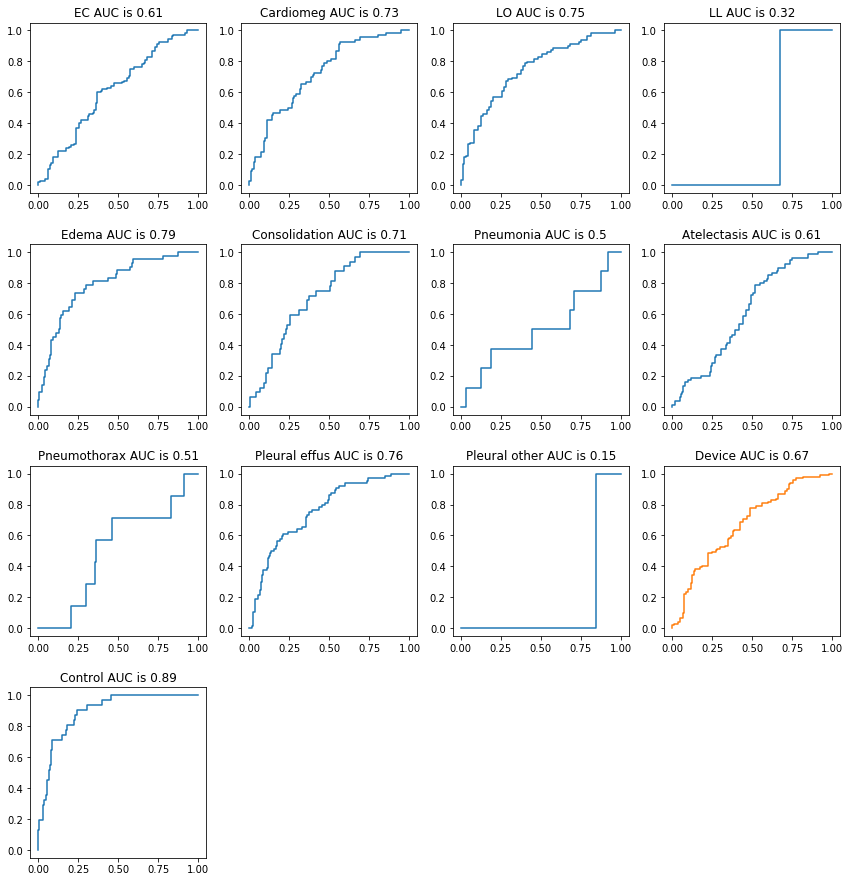

In [46]:
import matplotlib.pyplot as plt

plt.subplots_adjust(left=.125,bottom=.1,right=2,top=3, wspace=.2, hspace=.3)

plt.subplot(4,4,1)
plt.plot(fpr[0],tpr[0])
plt.title('EC AUC is {}'.format(round(roc_auc[0],2)))

plt.subplot(4,4,2)
plt.plot(fpr[1],tpr[1])
plt.title('Cardiomeg AUC is {}'.format(round(roc_auc[1],2)))

plt.subplot(4,4,3)
plt.plot(fpr[2],tpr[2])
plt.title('LO AUC is {}'.format(round(roc_auc[2],2)))

plt.subplot(4,4,4)
plt.plot(fpr[3],tpr[3])
plt.title('LL AUC is {}'.format(round(roc_auc[3],2)))

plt.subplot(4,4,5)
plt.plot(fpr[4],tpr[4])
plt.title('Edema AUC is {}'.format(round(roc_auc[4],2)))

plt.subplot(4,4,6)
plt.plot(fpr[5],tpr[5])
plt.title('Consolidation AUC is {}'.format(round(roc_auc[5],2)))

plt.subplot(4,4,7)
plt.plot(fpr[6],tpr[6])
plt.title('Pneumonia AUC is {}'.format(round(roc_auc[6],2)))

plt.subplot(4,4,8)
plt.plot(fpr[7],tpr[7])
plt.title('Atelectasis AUC is {}'.format(round(roc_auc[7],2)))

plt.subplot(4,4,9)
plt.plot(fpr[8],tpr[8])
plt.title('Pneumothorax AUC is {}'.format(round(roc_auc[8],2)))

plt.subplot(4,4,10)
plt.plot(fpr[9],tpr[9])
plt.title('Pleural effus AUC is {}'.format(round(roc_auc[9],2)))

plt.subplot(4,4,11)
plt.plot(fpr[10],tpr[10])
plt.title('Pleural other AUC is {}'.format(round(roc_auc[10],2)))

plt.subplot(4,4,12)
plt.plot(fpr[11],tpr[11])
plt.title('Fracture AUC is {}'.format(round(roc_auc[11],2)))

plt.subplot(4,4,12)
plt.plot(fpr[12],tpr[12])
plt.title('Device AUC is {}'.format(round(roc_auc[12],2)))

plt.subplot(4,4,13)
plt.plot(fpr[13],tpr[13])
plt.title('Control AUC is {}'.format(round(roc_auc[13],2)))

Text(0.5, 1.0, 'Control AUC is 0.91')

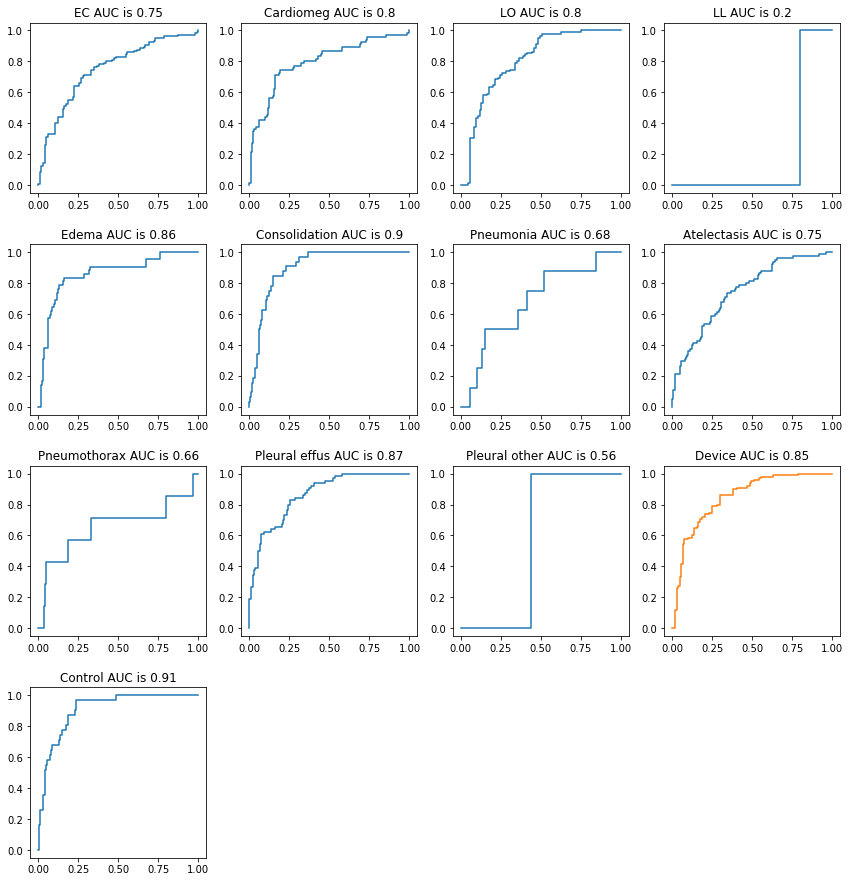

In [96]:
import matplotlib.pyplot as plt

plt.subplots_adjust(left=.125,bottom=.1,right=2,top=3, wspace=.2, hspace=.3)

plt.subplot(4,4,1)
plt.plot(fpr[0],tpr[0])
plt.title('EC AUC is {}'.format(round(roc_auc[0],2)))

plt.subplot(4,4,2)
plt.plot(fpr[1],tpr[1])
plt.title('Cardiomeg AUC is {}'.format(round(roc_auc[1],2)))

plt.subplot(4,4,3)
plt.plot(fpr[2],tpr[2])
plt.title('LO AUC is {}'.format(round(roc_auc[2],2)))

plt.subplot(4,4,4)
plt.plot(fpr[3],tpr[3])
plt.title('LL AUC is {}'.format(round(roc_auc[3],2)))

plt.subplot(4,4,5)
plt.plot(fpr[4],tpr[4])
plt.title('Edema AUC is {}'.format(round(roc_auc[4],2)))

plt.subplot(4,4,6)
plt.plot(fpr[5],tpr[5])
plt.title('Consolidation AUC is {}'.format(round(roc_auc[5],2)))

plt.subplot(4,4,7)
plt.plot(fpr[6],tpr[6])
plt.title('Pneumonia AUC is {}'.format(round(roc_auc[6],2)))

plt.subplot(4,4,8)
plt.plot(fpr[7],tpr[7])
plt.title('Atelectasis AUC is {}'.format(round(roc_auc[7],2)))

plt.subplot(4,4,9)
plt.plot(fpr[8],tpr[8])
plt.title('Pneumothorax AUC is {}'.format(round(roc_auc[8],2)))

plt.subplot(4,4,10)
plt.plot(fpr[9],tpr[9])
plt.title('Pleural effus AUC is {}'.format(round(roc_auc[9],2)))

plt.subplot(4,4,11)
plt.plot(fpr[10],tpr[10])
plt.title('Pleural other AUC is {}'.format(round(roc_auc[10],2)))

plt.subplot(4,4,12)
plt.plot(fpr[11],tpr[11])
plt.title('Fracture AUC is {}'.format(round(roc_auc[11],2)))

plt.subplot(4,4,12)
plt.plot(fpr[12],tpr[12])
plt.title('Device AUC is {}'.format(round(roc_auc[12],2)))

plt.subplot(4,4,13)
plt.plot(fpr[13],tpr[13])
plt.title('Control AUC is {}'.format(round(roc_auc[13],2)))

In [13]:
import resnet

Using TensorFlow backend.


In [95]:
def resnet50(input_shape):
    model = keras.applications.resnet50.ResNet50(input_shape, 14)
    model.compile(loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy'])
    return(model)

In [97]:
model = keras.applications.resnet50.ResNet50(input_shape = xrays.shape[1:], classes = 14, weights=None)
model.layers[-1].activation = keras.activations.sigmoid
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.fit(xrays,
          y1,
          batch_size=8,
          epochs=5,
          verbose=1,
          validation_split=0.2)

Train on 8948 samples, validate on 2237 samples
Epoch 1/5
8948/8948 [==============================] - 46132s 5s/step - loss: 0.4218 - acc: 0.8329 - val_loss: 0.4967 - val_acc: 0.8364
Epoch 2/5
8948/8948 [==============================] - 245s 27ms/step - loss: 0.4161 - acc: 0.8330 - val_loss: 0.5288 - val_acc: 0.8261
Epoch 3/5
8948/8948 [==============================] - 247s 28ms/step - loss: 0.4176 - acc: 0.8330 - val_loss: 0.4092 - val_acc: 0.8366
Epoch 4/5
8948/8948 [==============================] - 249s 28ms/step - loss: 0.4136 - acc: 0.8329 - val_loss: 1.0097 - val_acc: 0.8220
Epoch 5/5
8948/8948 [==============================] - 249s 28ms/step - loss: 0.4128 - acc: 0.8329 - val_loss: 0.4285 - val_acc: 0.8366


In [ ]:
model.summary()

In [ ]:
pred = model.predict(xtest)

In [ ]:
sklearn.metrics.confusion_matrix(ytest, pred)

In [ ]:
pred[3]

In [ ]:
np_utils.to_categorical(ytest, num_classes=14)